## Sumbit example

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## Final model submit function

Принимает на вход путь к набору данных в формате `.csv`

На выходе получается файл с предиктами в формате `.csv`

Пример содержания:
```
0.432
0.412
0.312
```

Реализация модели - между ними

In [32]:
data = pd.read_csv("train.csv")
data.head`()

,Unnamed: 0,clicks,likes,buys,4xx_errors,5xx_errors,average_dwelltime,source_attractiveness
count,8000.000000,7.727000e+03,7.624000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000,8000.000000
mean,5006.138875,2.749785e+06,5.985027e+05,5.810509e+05,8.204958e+04,2.769224e+04,6.979549,0.191997
std,2893.886162,4.699120e+06,1.978345e+06,2.262221e+06,1.555219e+05,7.946935e+04,10.004924,0.227873
min,0.000000,5.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-0.681718
25%,2493.250000,3.599210e+05,0.000000e+00,0.000000e+00,2.943000e+03,0.000000e+00,1.503928,0.038220
50%,5035.000000,1.097221e+06,3.399550e+04,0.000000e+00,2.671750e+04,0.000000e+00,4.022802,0.154256
75%,7521.250000,2.915358e+06,2.860638e+05,0.000000e+00,9.500225e+04,2.016375e+04,8.899400,0.282510
max,9999.000000,6.203206e+07,5.582181e+07,4.277391e+07,2.904996e+06,1.865588e+06,211.218066,1.355736


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8000 non-null   int64  
 1   category               8000 non-null   object 
 2   clicks                 7727 non-null   float64
 3   likes                  7624 non-null   float64
 4   buys                   8000 non-null   int64  
 5   4xx_errors             8000 non-null   int64  
 6   5xx_errors             8000 non-null   int64  
 7   complaints_count       7527 non-null   object 
 8   average_dwelltime      8000 non-null   float64
 9   source_attractiveness  8000 non-null   float64
 10  date_of_registration   8000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 687.6+ KB


In [35]:
data.describe()

,Unnamed: 0,clicks,likes,buys,4xx_errors,5xx_errors,average_dwelltime,source_attractiveness
count,8000.000000,7.727000e+03,7.624000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000,8000.000000
mean,5006.138875,2.749785e+06,5.985027e+05,5.810509e+05,8.204958e+04,2.769224e+04,6.979549,0.191997
std,2893.886162,4.699120e+06,1.978345e+06,2.262221e+06,1.555219e+05,7.946935e+04,10.004924,0.227873
min,0.000000,5.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-0.681718
25%,2493.250000,3.599210e+05,0.000000e+00,0.000000e+00,2.943000e+03,0.000000e+00,1.503928,0.038220
50%,5035.000000,1.097221e+06,3.399550e+04,0.000000e+00,2.671750e+04,0.000000e+00,4.022802,0.154256
75%,7521.250000,2.915358e+06,2.860638e+05,0.000000e+00,9.500225e+04,2.016375e+04,8.899400,0.282510
max,9999.000000,6.203206e+07,5.582181e+07,4.277391e+07,2.904996e+06,1.865588e+06,211.218066,1.355736


In [44]:
data = pd.read_csv("train.csv")
data.drop(data.columns[0], axis=1, inplace=True)
# --- 1. Предобработка данных ---

# Обработка пропущенных значений
# Заполним пропуски в likes и buys средними значениями, создавая копии
data['average_dwelltime'] = pd.to_numeric(data['average_dwelltime'], errors='coerce')
data['complaints_count'] = pd.to_numeric(data['complaints_count'], errors='coerce')
data['likes'] = data['likes'].fillna(data['likes'].mean())
data['buys'] = data['buys'].fillna(data['buys'].mean())
data['average_dwelltime'] = data['average_dwelltime'].fillna(data['average_dwelltime'].mean())
data['complaints_count'] = data['complaints_count'].fillna(data['complaints_count'].mean())


# Удаляем строки с другими пропусками
data_clean = data.dropna()

# Преобразование категориальных данных
data_encoded = pd.get_dummies(data_clean, columns=['category'], drop_first=True)

# Преобразование даты регистрации в количество дней с момента регистрации
data_encoded['date_of_registration'] = pd.to_datetime(data_encoded['date_of_registration'], errors='coerce')
current_date = pd.to_datetime('now')
data_encoded['days_since_registration'] = (current_date - data_encoded['date_of_registration']).dt.days

# Удаляем исходный столбец даты
data_final = data_encoded.drop('date_of_registration', axis=1)

In [45]:
data_final.info()
data_final.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7727 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clicks                       7727 non-null   float64
 1   likes                        7727 non-null   float64
 2   buys                         7727 non-null   int64  
 3   4xx_errors                   7727 non-null   int64  
 4   5xx_errors                   7727 non-null   int64  
 5   complaints_count             7727 non-null   float64
 6   average_dwelltime            7727 non-null   float64
 7   source_attractiveness        7727 non-null   float64
 8   category_information_source  7727 non-null   bool   
 9   category_news                7727 non-null   bool   
 10  category_porn                7727 non-null   bool   
 11  category_social              7727 non-null   bool   
 12  days_since_registration      7727 non-null   int64  
dtypes: bool(4), float64(5),

,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,category_information_source,category_news,category_porn,category_social,days_since_registration
0,6488536.0,598502.743179,0,82221,0,0.0,18.450527,0.461750,False,False,False,False,1642
1,874840.0,21100.000000,0,12872,0,0.0,10.721619,-0.022317,True,False,False,False,91
2,571210.0,94707.000000,0,0,7420,0.0,1.922243,0.046396,True,False,False,False,98
3,89534.0,924.000000,0,834,0,0.0,2.149243,-0.093360,False,True,False,False,38
4,1043953.0,289288.000000,0,58375,20260,3948.0,3.764965,0.027303,True,False,False,False,146


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

def predict(data_path):
    # Загрузка данных
    data = pd.read_csv(data_path)
    data.replace('-', np.nan, inplace=True)
    # --- 1. Предобработка данных ---
    
    # Обработка пропущенных значений
    # Заполним пропуски в likes и buys средними значениями, создавая копии
    data['likes'] = data['likes'].fillna(data['likes'].mean())
    data['buys'] = data['buys'].fillna(data['buys'].mean())
    data['average_dwelltime'] = data['average_dwelltime'].fillna(data['average_dwelltime'].mean())
    
    # Удаляем строки с другими пропусками
    data_clean = data.dropna()

    # Преобразование категориальных данных
    data_encoded = pd.get_dummies(data_clean, columns=['category'], drop_first=True)
    
    # Преобразование даты регистрации в количество дней с момента регистрации
    data_encoded['date_of_registration'] = pd.to_datetime(data_encoded['date_of_registration'], errors='coerce')
    current_date = pd.to_datetime('now')
    data_encoded['days_since_registration'] = (current_date - data_encoded['date_of_registration']).dt.days
    
    # Удаляем исходный столбец даты
    data_final = data_encoded.drop('date_of_registration', axis=1)
    
    # --- 2. Анализ данных ---
    
    # Построим корреляционную матрицу
    plt.figure(figsize=(10, 8))
    sns.heatmap(data_final.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
    
    # --- 3. Обучение модели ---
    
    # Выделим признаки (X) и целевую переменную (y)
    X = data_final.drop('source_attractiveness', axis=1)
    y = data_final['source_attractiveness']
    
    # Разделим данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Предсказания на тестовой выборке
    y_pred = model.predict(X_test)
    
    # Оценка модели (среднеквадратичная ошибка)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.4f}')
    
    # --- 4. Сохранение предсказаний ---
    
    # Предсказания для всех данных
    final_predictions = model.predict(X)
    
    # Запись предсказаний в файл
    with open('output.csv', 'w') as file:
        for predict in final_predictions:
            file.write(str(predict) + '\n')



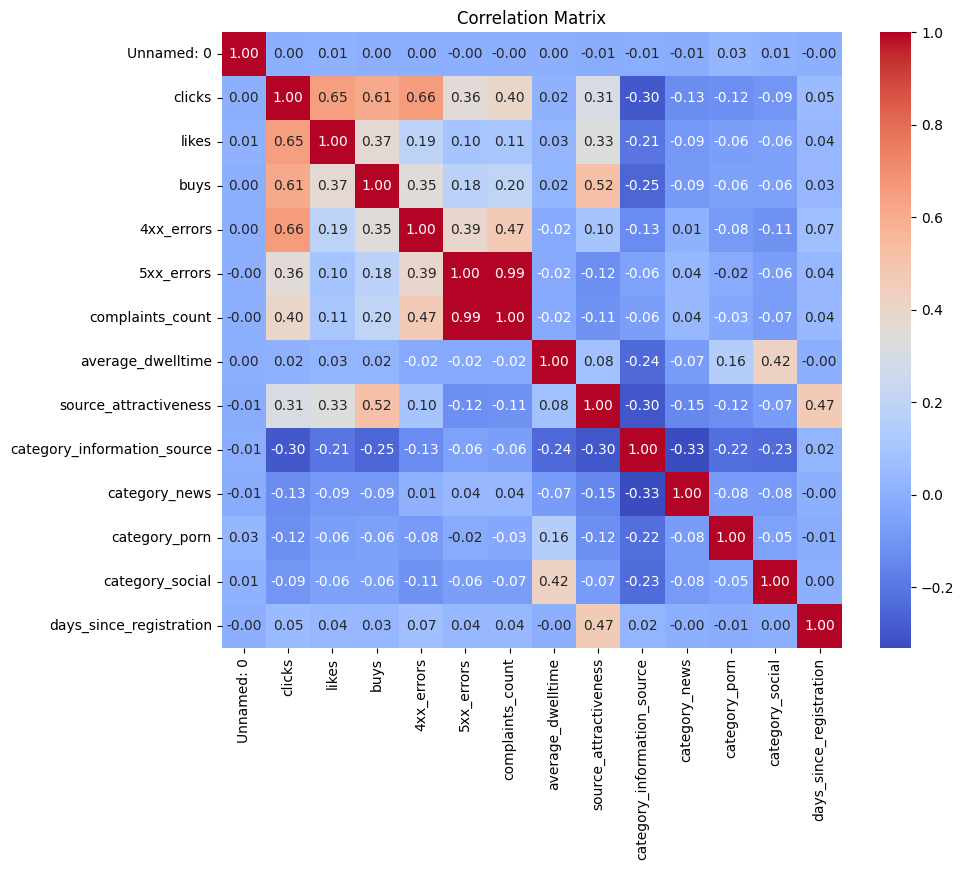

Mean Squared Error: 0.0149


In [54]:
predict("train.csv")